In [70]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Data inspection

In [155]:
df = pd.read_stata('input/Panel101_new.dta')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   country  70 non-null     category
 1   year     70 non-null     int16   
 2   y        70 non-null     float64 
 3   y_bin    70 non-null     float32 
 4   x1       70 non-null     float32 
 5   x2       70 non-null     float32 
 6   x3       70 non-null     float32 
 7   opinion  70 non-null     category
 8   op       70 non-null     float32 
dtypes: category(2), float32(5), float64(1), int16(1)
memory usage: 2.9 KB
None


,country,year,y,y_bin,x1,x2,x3,opinion,op
0,A,2011,1.342788e+09,1.0,0.277904,-1.107956,0.282554,Str agree,1.0
1,A,2012,-1.899661e+09,0.0,0.320685,-0.948720,0.492538,Disag,0.0
2,A,2013,-1.123436e+07,0.0,0.363466,-0.789484,0.702523,Disag,0.0
3,A,2014,2.645775e+09,1.0,0.246144,-0.885533,-0.094391,Disag,0.0
4,A,2015,3.008335e+09,1.0,0.424623,-0.729768,0.946131,Disag,0.0
...,...,...,...,...,...,...,...,...,...
65,G,2016,1.323696e+09,1.0,1.087186,-1.409817,2.829808,Str disag,0.0
66,G,2017,2.545242e+08,1.0,0.781075,-1.328000,4.278224,Str agree,1.0
67,G,2018,3.297033e+09,1.0,1.257879,-1.577367,4.587326,Disag,0.0
68,G,2019,3.011821e+09,1.0,1.242777,-1.601218,6.113762,Disag,0.0


In [35]:
print('countries:', df.country.nunique())
df.describe()

countries: 7


,year,y,y_bin,x1,x2,x3,op
count,70.00000,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.00000
mean,2015.50000,1.845072e+09,0.800000,0.648001,0.133869,0.761851,0.50000
std,2.89302,3.015167e+09,0.402888,0.468070,1.371099,1.446332,0.50361
min,2011.00000,-7.863483e+09,0.000000,-0.567575,-1.621761,-1.165387,0.00000
25%,2013.00000,2.465716e+08,1.000000,0.328960,-1.215649,-0.079315,0.00000
50%,2015.50000,1.897898e+09,1.000000,0.641262,-0.462143,0.514191,0.50000
75%,2018.00000,3.372262e+09,1.000000,1.095843,1.607754,1.154864,1.00000
max,2020.00000,8.941232e+09,1.000000,1.446412,2.530277,7.168922,1.00000


In [50]:
# Quick sense check on the y_bin and op values (uncomment the one you want to inspect)

#df.loc[df['op']!=0]
#df.loc[df['y_bin']!=1]

### Visualise

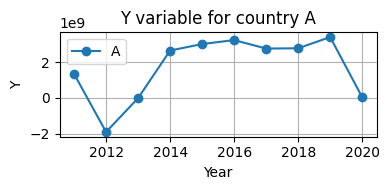

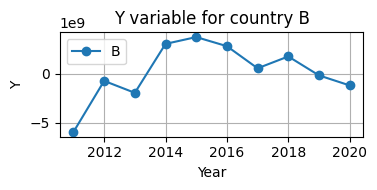

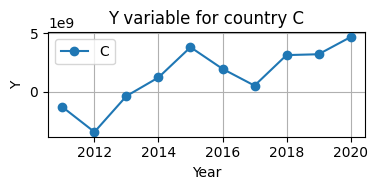

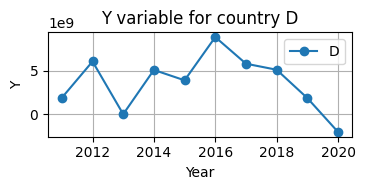

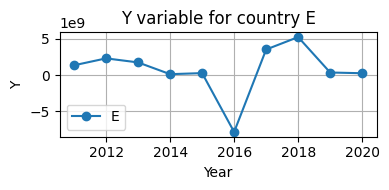

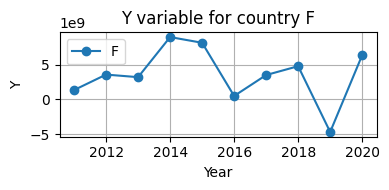

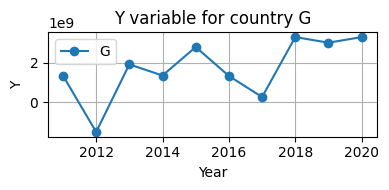

In [159]:
# Group data by country
countries = df['country'].unique()

# Create a plot for each country
for country in countries:
    country_data = df[df['country'] == country]
    plt.figure(figsize=(4, 2))
    plt.plot(country_data['year'], country_data['y'], marker='o', label=f'{country}')
    plt.title(f'Y variable for country {country}')
    plt.xlabel('Year')
    plt.ylabel('Y')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


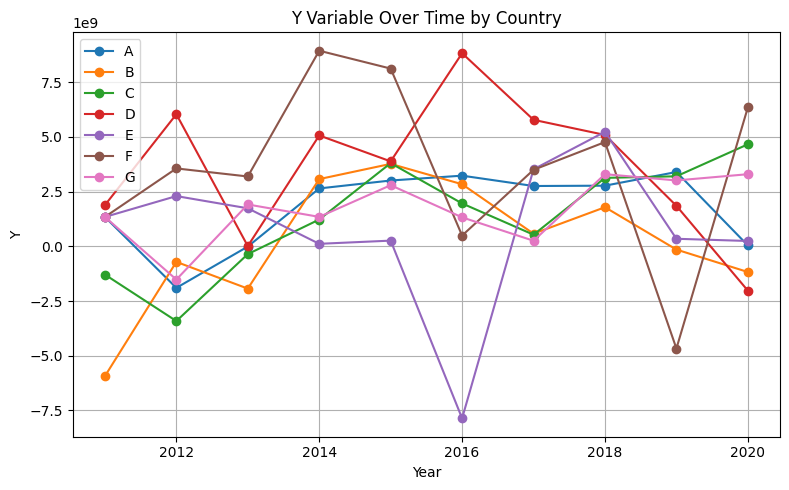

In [160]:
# Group data by country
countries = df['country'].unique()

# Create a single plot for all countries
plt.figure(figsize=(8, 5))
for country in countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data['year'], country_data['y'], marker='o', label=f'{country}')

plt.title('Y Variable Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Summary stats to match xtsum in Stata

In [43]:
# Compute within and between variations
def xtsum_statistics(df, panel_id, time_id, variable):
    # Overall mean and standard deviation
    overall_mean = df[variable].mean()
    overall_std = df[variable].std()
    overall_min = df[variable].min()
    overall_max = df[variable].max()

    # Between variation (mean of group means)
    group_means = df.groupby(panel_id, observed=False)[variable].mean() # observed: This only applies if any of the groupers are Categoricals. If True: only show observed values for categorical groupers. If False: show all values for categorical groupers.
    between_std = group_means.std()
    between_min = group_means.min()
    between_max = group_means.max()

    # Within variation (deviation of observations from group mean)
    df['group_mean'] = df.groupby(panel_id, observed=False)[variable].transform('mean')
    df['within_dev'] = df[variable] - df['group_mean'] + overall_mean
    within_std = df['within_dev'].std()
    within_min = df['within_dev'].min()
    within_max = df['within_dev'].max()

    # Clean up temporary columns
    df.drop(columns=['group_mean', 'within_dev'], inplace=True)

    # Return the statistics
    return {
        'overall_mean': overall_mean,
        'overall_std': overall_std,
        'overall_min': overall_min,
        'overall_max': overall_max,
        'between_std': between_std,
        'between_min': between_min,
        'between_max': between_max,
        'within_std': within_std,
        'within_min': within_min,
        'within_max': within_max
    }

# Example usage of xtsum_statistics
stats_y = xtsum_statistics(df, panel_id='country', time_id='year', variable='y')
stats_x1 = xtsum_statistics(df, panel_id='country', time_id='year', variable='x1')

# Display the results
print("Summary Statistics: for y")
for key, value in stats_y.items():
    print(f"{key}: {value:.4f}")
print('\n')

# Display the results
print("Summary Statistics: for x1")
for key, value in stats_x1.items():
    print(f"{key}: {value:.4f}")

Summary Statistics: for y
overall_mean: 1845072181.0571
overall_std: 3015166973.1877
overall_min: -7863482880.0000
overall_max: 8941232128.0000
between_std: 1314345575.2421
between_min: 213946113.6000
between_max: 3640540105.3000
within_std: 2754823811.3746
within_min: -6741484388.5429
within_max: 7227053217.8571


Summary Statistics: for x1
overall_mean: 0.6480
overall_std: 0.4681
overall_min: -0.5676
overall_max: 1.4464
between_std: 0.3816
between_min: 0.1930
between_max: 1.2391
within_std: 0.3041
within_min: -0.5451
within_max: 1.5036


## Estimating pandel data model with fixed effects

In [161]:
import statsmodels.api as sm
from linearmodels.panel import PooledOLS
from linearmodels.panel import PanelOLS


### Preparing data: multi-indexing (and dummies)

In [166]:
# Place the two panel identifiers (country (i) and year (t) in the index)
df_panel = df.copy()
df_panel = df_panel.set_index(["country", "year"])
df_panel

y  y_bin        x1        x2        x3    opinion  \
country year                                                                 
A       2011  1.342788e+09    1.0  0.277904 -1.107956  0.282554  Str agree   
        2012 -1.899661e+09    0.0  0.320685 -0.948720  0.492538      Disag   
        2013 -1.123436e+07    0.0  0.363466 -0.789484  0.702523      Disag   
        2014  2.645775e+09    1.0  0.246144 -0.885533 -0.094391      Disag   
        2015  3.008335e+09    1.0  0.424623 -0.729768  0.946131      Disag   
...                    ...    ...       ...       ...       ...        ...   
G       2016  1.323696e+09    1.0  1.087186 -1.409817  2.829808  Str disag   
        2017  2.545242e+08    1.0  0.781075 -1.328000  4.278224  Str agree   
        2018  3.297033e+09    1.0  1.257879 -1.577367  4.587326      Disag   
        2019  3.011821e+09    1.0  1.242777 -1.601218  6.113762      Disag   
        2020  3.296283e+09    1.0  1.234200 -1.621761  7.168922      Disag   

               op  
country year       
A       2011  1.0  
        2012  0.0  
        2013  0.0  
        2014  0.0  
        2015  0.0  
...           ...  
G       2016  0.0  
        2017  1.0  
        2018  0.0  
        2019  0.0  
        2020  0.0  

[70 rows x 7 columns]

In [112]:
# We may want to use actual dummies in our regressions
df_dum = df.copy()
df_dum['yr'] = pd.Categorical(df_dum['year'])
df_dum['cntry'] = df_dum['country']
df_dum = pd.get_dummies(df_dum,columns=['yr', 'cntry'])

df_panel_dum = df_dum.set_index(["country", "year"])
df_panel_dum.sample(7)

y  y_bin        x1        x2        x3    opinion  \
country year                                                                 
E       2012  2.296009e+09    1.0  0.419040  1.706840  0.793135  Str agree   
G       2016  1.323696e+09    1.0  1.087186 -1.409817  2.829808  Str disag   
D       2018  5.090524e+09    1.0  0.359426  1.874287  0.087868  Str agree   
        2017  5.782000e+09    1.0  0.486367  1.742339 -0.037315  Str disag   
E       2020  2.439207e+08    1.0  0.606621  1.611904 -0.089299  Str disag   
B       2019 -1.490720e+08    0.0  0.704516  1.423646 -0.448419      Agree   
G       2013  1.912770e+09    1.0  1.252575 -1.407928  1.426632  Str agree   

               op  yr_2011  yr_2012  yr_2013  ...  yr_2018  yr_2019  yr_2020  \
country year                                  ...                              
E       2012  1.0    False     True    False  ...    False    False    False   
G       2016  0.0    False    False    False  ...    False    False    False   
D       2018  1.0    False    False    False  ...     True    False    False   
        2017  0.0    False    False    False  ...    False    False    False   
E       2020  0.0    False    False    False  ...    False    False     True   
B       2019  1.0    False    False    False  ...    False     True    False   
G       2013  1.0    False    False     True  ...    False    False    False   

              cntry_A  cntry_B  cntry_C  cntry_D  cntry_E  cntry_F  cntry_G  
country year                                                                 
E       2012    False    False    False    False     True    False    False  
G       2016    False    False    False    False    False    False     True  
D       2018    False    False    False     True    False    False    False  
        2017    False    False    False     True    False    False    False  
E       2020    False    False    False    False     True    False    False  
B       2019    False     True    False    False    False    False    False  
G       2013    False    False    False    False    False    False     True  

[7 rows x 24 columns]

### 1) Basic regression on panel data (what NOT to do)

`PooledOLS` is just plain OLS that understands panel data structures. It is useful as a base model. Here y is modeled using x1 and x2.

In [145]:
exog_vars = ['x1','x2'] 
exog = sm.add_constant(df_panel[exog_vars])
mod = PooledOLS(df_panel['y'], exog)
pooled_res = mod.fit(cov_type="robust") # unadjusted, robust, clustered, kernel
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                      y   R-squared:                        0.0061
Estimator:                  PooledOLS   R-squared (Between):             -0.1162
No. Observations:                  70   R-squared (Within):               0.0303
Date:                Tue, Jan 21 2025   R-squared (Overall):              0.0061
Time:                        15:54:53   Log-likelihood                   -1626.5
Cov. Estimator:                Robust                                           
                                        F-statistic:                      0.2066
Entities:                           7   P-value                           0.8139
Avg Obs:                      10.0000   Distribution:                    F(2,67)
Min Obs:                      10.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             0.3229
                            

### 2.a) With entity fixed effects via de-meaning

The FE regression model has n different intercepts, one for each entity. These intercepts can be represented by a set of binary variables, and these binary variables absorb the influences of all omitted variables that differ from one entity to the next but are constant over time.

Entity effects are included by setting `entity_effects=True`. This is equivalent to including dummies for each entity. In this panel, this would add 545 dummy variables and estimation of the model would be considerably slower. `PanelOLS` does not actually use dummy variables and instead uses group-wise demeaning to achieve the same effect.

Time-invariant variables cannot be included when using entity effects since, once demeaned, these will all be 0.

In [168]:
exog_vars = ['x1','x2'] 
exog = sm.add_constant(df_panel_dum[exog_vars])

mod = PanelOLS(df_panel['y'], exog, entity_effects=True)
fe_res = mod.fit(cov_type='robust') #clustered', cluster_entity= True)  # unadjusted, robust, clustered, kernel
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                      y   R-squared:                        0.0903
Estimator:                   PanelOLS   R-squared (Between):             -4.4541
No. Observations:                  70   R-squared (Within):               0.0903
Date:                Tue, Jan 21 2025   R-squared (Overall):             -0.6605
Time:                        16:26:00   Log-likelihood                   -1617.1
Cov. Estimator:                Robust                                           
                                        F-statistic:                      3.0291
Entities:                           7   P-value                           0.0557
Avg Obs:                      10.0000   Distribution:                    F(2,61)
Min Obs:                      10.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             2.9899
                            

### 2.b) With entity fixed effects via dummies

We can try to replicate this with the dummies as explicit fixed effects. Do we get the same coefficients for x1 and x2?

In [167]:
# Can you explain why one dummy has to be removed?
country_dummies = df_panel_dum.columns[df_panel_dum.columns.str.startswith('cntry_')].to_list()
country_dummies.remove('cntry_G')
#country_dummies

In [169]:
exog_vars = ['x1','x2'] + country_dummies
exog = sm.add_constant(df_panel_dum[exog_vars])

mod = PanelOLS(df_panel_dum['y'], exog, entity_effects=False) # Turn off entity effects as we have dummies
fe_res = mod.fit(cov_type='robust') 
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                      y   R-squared:                        0.2406
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                  70   R-squared (Within):               0.0903
Date:                Tue, Jan 21 2025   R-squared (Overall):              0.2406
Time:                        16:27:40   Log-likelihood                   -1617.1
Cov. Estimator:                Robust                                           
                                        F-statistic:                      2.4165
Entities:                           7   P-value                           0.0245
Avg Obs:                      10.0000   Distribution:                    F(8,61)
Min Obs:                      10.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             2.0341
                            

### 3.a) With entity and time fixed effects via de-meaning

In [171]:
exog_vars = ['x1','x2'] 
exog = sm.add_constant(df_panel_dum[exog_vars])

mod = PanelOLS(df_panel['y'], exog, entity_effects=True, time_effects=True)
fe_res = mod.fit(cov_type="robust")  # unadjusted, robust, clustered, kernel
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                      y   R-squared:                        0.0348
Estimator:                   PanelOLS   R-squared (Between):             -3.8649
No. Observations:                  70   R-squared (Within):               0.0761
Date:                Tue, Jan 21 2025   R-squared (Overall):             -0.5751
Time:                        16:30:02   Log-likelihood                   -1610.6
Cov. Estimator:                Robust                                           
                                        F-statistic:                      0.9384
Entities:                           7   P-value                           0.3978
Avg Obs:                      10.0000   Distribution:                    F(2,52)
Min Obs:                      10.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             0.6671
                            

### 3.b. With entity and time fixed effects via dummies

In [153]:
year_dummies = df_panel_dum.columns[df_panel_dum.columns.str.startswith('yr_')].to_list()
year_dummies.remove('yr_2011')
#year_dummies

In [162]:
exog_vars = ['x1','x2'] + year_dummies
exog = sm.add_constant(df_panel_dum[exog_vars])

mod = PanelOLS(df_panel['y'], exog, entity_effects=True) # time effects replaced with dummies
fe_res = mod.fit(cov_type="robust")  # unadjusted, robust, clustered, kernel
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                      y   R-squared:                        0.2435
Estimator:                   PanelOLS   R-squared (Between):             -3.8649
No. Observations:                  70   R-squared (Within):               0.2435
Date:                Tue, Jan 21 2025   R-squared (Overall):             -0.4353
Time:                        16:24:40   Log-likelihood                   -1610.6
Cov. Estimator:                Robust                                           
                                        F-statistic:                      1.5220
Entities:                           7   P-value                           0.1520
Avg Obs:                      10.0000   Distribution:                   F(11,52)
Min Obs:                      10.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             2.6196
                            